In [12]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import sys
import sklearn
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [15]:
def set_default_plot_properties():
    plt.style.use('mpl20')
    matplotlib.rcParams['figure.dpi'] = 100
    matplotlib.rcParams['figure.figsize'] = 15, 5

def sns_set_size(height, width):
    sns.set(rc={'figure.figsize':(width, height)})

set_default_plot_properties()

### Python & Library Versions

In [16]:
versions = ( ("matplotlib", matplotlib.__version__),
             ("numpy", np.__version__),
             ("pandas", pd.__version__),
             ("sklearn", sklearn.__version__),
             ("seaborn", sns.__version__)
             )

print(sys.version, "\n")
print("library" + " " * 4 + "version")
print("-" * 18)

for tup1, tup2 in versions:
    print("{:11} {}".format(tup1, tup2))


3.8.10 (default, Jun 22 2022, 20:18:18) 
[GCC 9.4.0] 

library    version
------------------
matplotlib  3.5.2
numpy       1.23.4
pandas      1.3.3
sklearn     1.1.1
seaborn     0.11.2


### Read a dataset

In [17]:
full_df = pd.read_csv('../datasets/folktables-NY-2018.csv')

In [18]:
full_df['LABEL_ESR'] = full_df['ESR']
full_df = full_df.drop(columns=['ESR'])

In [19]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196967 entries, 0 to 196966
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   AGEP       196967 non-null  int64
 1   SCHL       196967 non-null  int64
 2   MAR        196967 non-null  int64
 3   RELP       196967 non-null  int64
 4   DIS        196967 non-null  int64
 5   ESP        196967 non-null  int64
 6   CIT        196967 non-null  int64
 7   MIG        196967 non-null  int64
 8   MIL        196967 non-null  int64
 9   ANC        196967 non-null  int64
 10  NATIVITY   196967 non-null  int64
 11  DEAR       196967 non-null  int64
 12  DEYE       196967 non-null  int64
 13  DREM       196967 non-null  int64
 14  SEX        196967 non-null  int64
 15  RAC1P      196967 non-null  int64
 16  LABEL_ESR  196967 non-null  int64
dtypes: int64(17)
memory usage: 25.5 MB


### Checking If Nulls Mean a Separate Category

In [20]:
full_df.isnull().sum()

AGEP         0
SCHL         0
MAR          0
RELP         0
DIS          0
ESP          0
CIT          0
MIG          0
MIL          0
ANC          0
NATIVITY     0
DEAR         0
DEYE         0
DREM         0
SEX          0
RAC1P        0
LABEL_ESR    0
dtype: int64

In [21]:
# Percentage of nulls in each column
full_df.isnull().sum() / full_df.shape[0]

AGEP         0.0
SCHL         0.0
MAR          0.0
RELP         0.0
DIS          0.0
ESP          0.0
CIT          0.0
MIG          0.0
MIL          0.0
ANC          0.0
NATIVITY     0.0
DEAR         0.0
DEYE         0.0
DREM         0.0
SEX          0.0
RAC1P        0.0
LABEL_ESR    0.0
dtype: float64

### Data Profiling

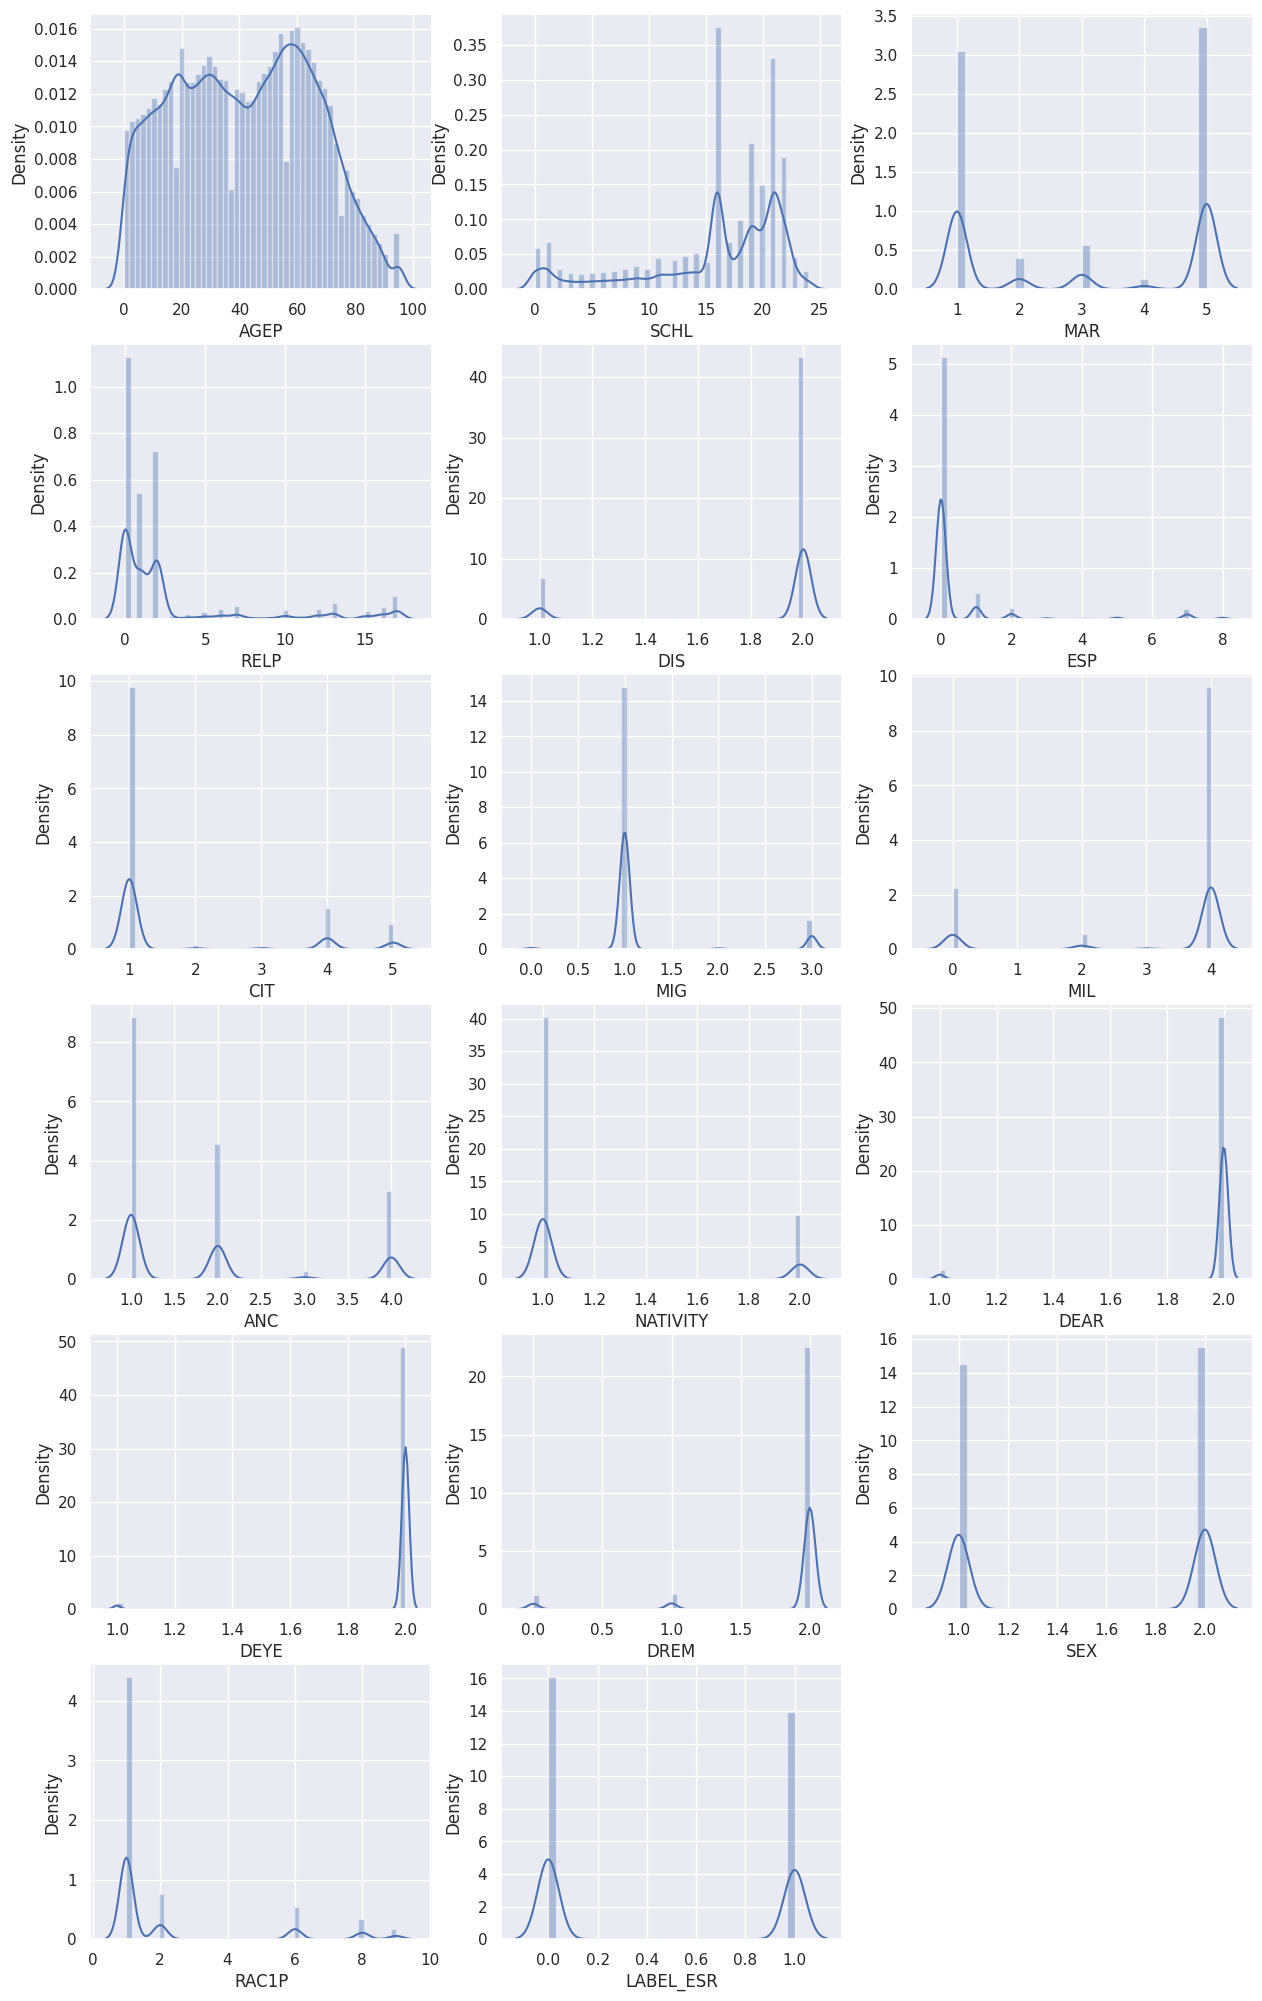

In [22]:
# Look at densities of each column
sns_set_size(height=25, width=15)

fig = plt.figure()
gs0 = matplotlib.gridspec.GridSpec(ncols=3, nrows=6, figure=fig)
for idx, column in enumerate(full_df.columns):
    n_row, n_col = divmod(idx, 3)
    ax = fig.add_subplot(gs0[n_row, n_col])
    sns.distplot(full_df[column], ax=ax)

set_default_plot_properties()

### Group Data By Race

In [23]:
full_df[full_df['SCHL'] == 0].head()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,RAC1P,LABEL_ESR
433,2,0,5,17,2,0,1,3,0,2,1,2,2,0,2,9,0
484,2,0,5,17,2,0,1,3,0,2,1,2,2,0,2,9,0
1141,0,0,5,17,2,0,1,0,0,1,1,2,2,0,1,8,0
1191,1,0,5,17,2,0,1,3,0,1,1,2,2,0,1,2,0
1410,0,0,5,17,2,0,1,0,0,1,1,2,2,0,2,1,0


In [24]:
def plot_column_grouped_by_race_nulls(plot_column):
    sns_set_size(height=18, width=15)

    fig = plt.figure()
    gs0 = matplotlib.gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    race_names = ['White alone', 'Black or African American alone', 'American Indian alone',
                  'Alaska Native alone', 'American Indian', 'Asian alone',
                  'Hawaiian and Other Pacific Islander alone', 'Some Other Race alone', 'Two or More Races']

    for i in range(len(race_names)):
        n_row, n_col = divmod(i, 3)
        ax = fig.add_subplot(gs0[n_row, n_col])
        ax.set_title(race_names[i])
        sns.distplot(full_df[full_df[plot_column] == 0][full_df['RAC1P'] == i + 1][plot_column], ax=ax)

    set_default_plot_properties()

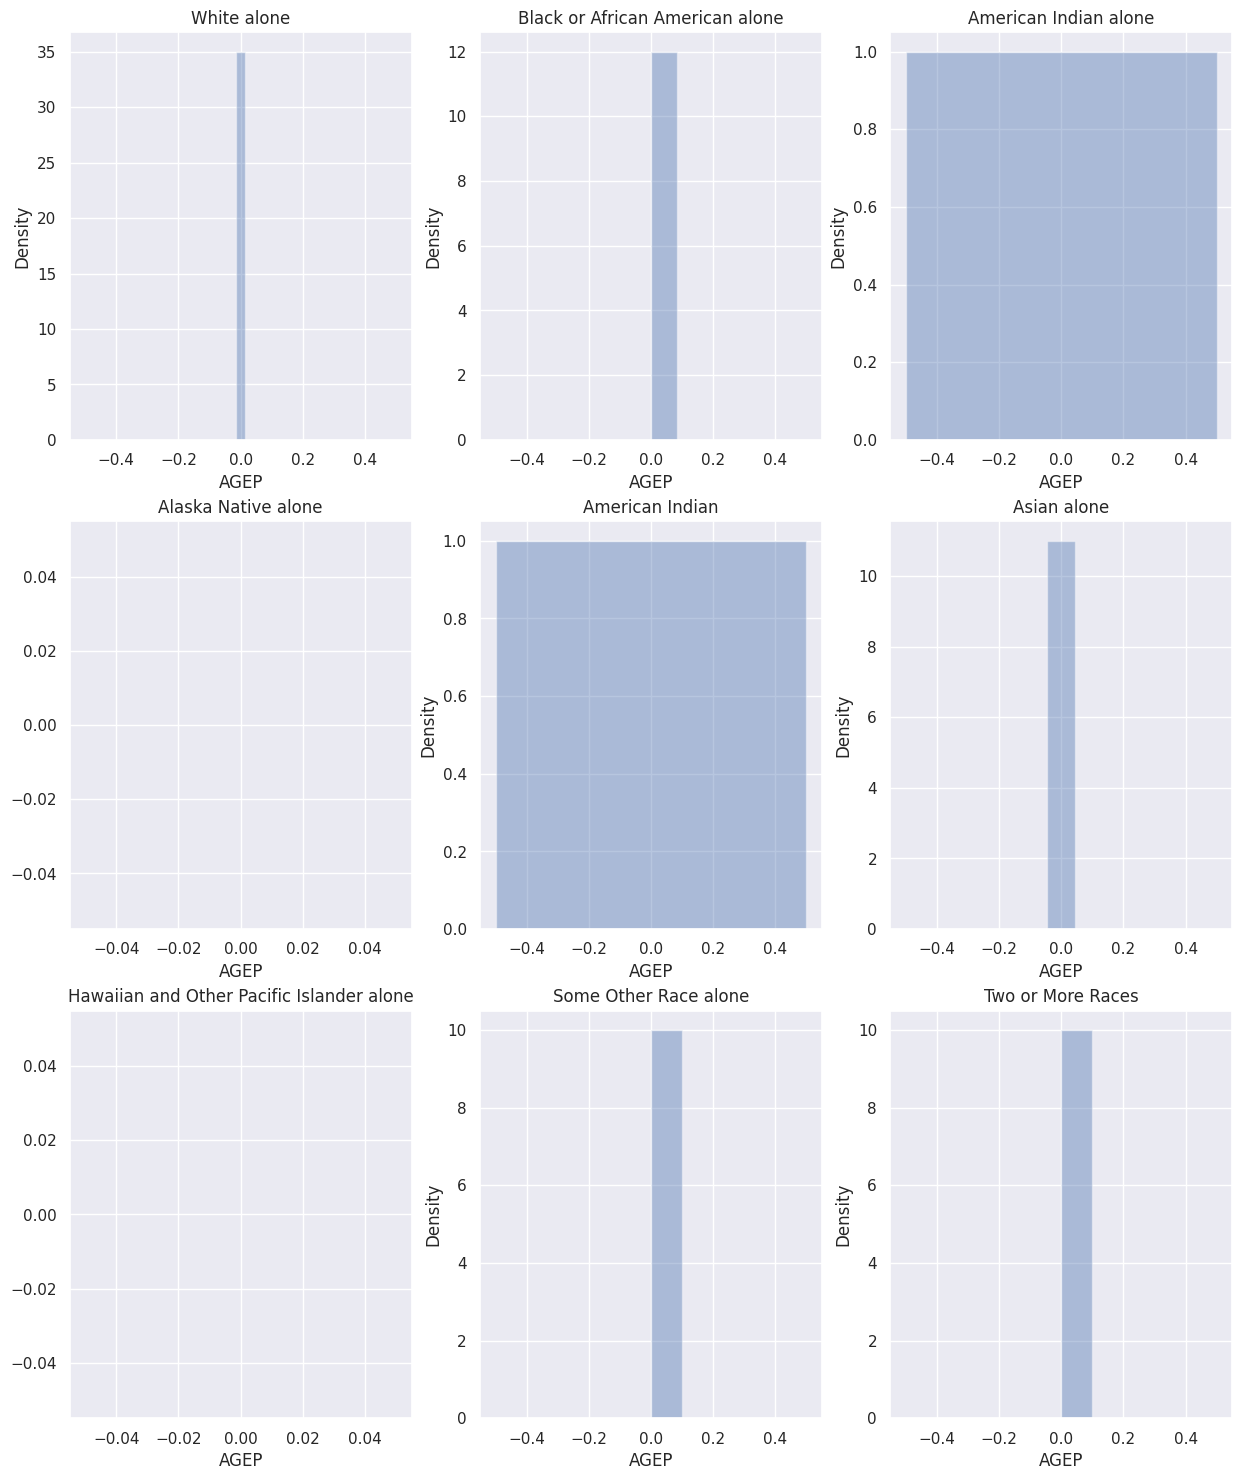

In [25]:
plot_column_grouped_by_race_nulls('AGEP')

In [26]:
def plot_column_grouped_by_race(plot_column):
    sns_set_size(height=18, width=15)

    fig = plt.figure()
    gs0 = matplotlib.gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    race_names = ['White alone', 'Black or African American alone', 'American Indian alone',
                  'Alaska Native alone', 'American Indian', 'Asian alone',
                  'Hawaiian and Other Pacific Islander alone', 'Some Other Race alone', 'Two or More Races']

    for i in range(len(race_names)):
        n_row, n_col = divmod(i, 3)
        ax = fig.add_subplot(gs0[n_row, n_col])
        ax.set_title(race_names[i])
        sns.distplot(full_df[full_df['RAC1P'] == i + 1][plot_column], ax=ax)

    set_default_plot_properties()


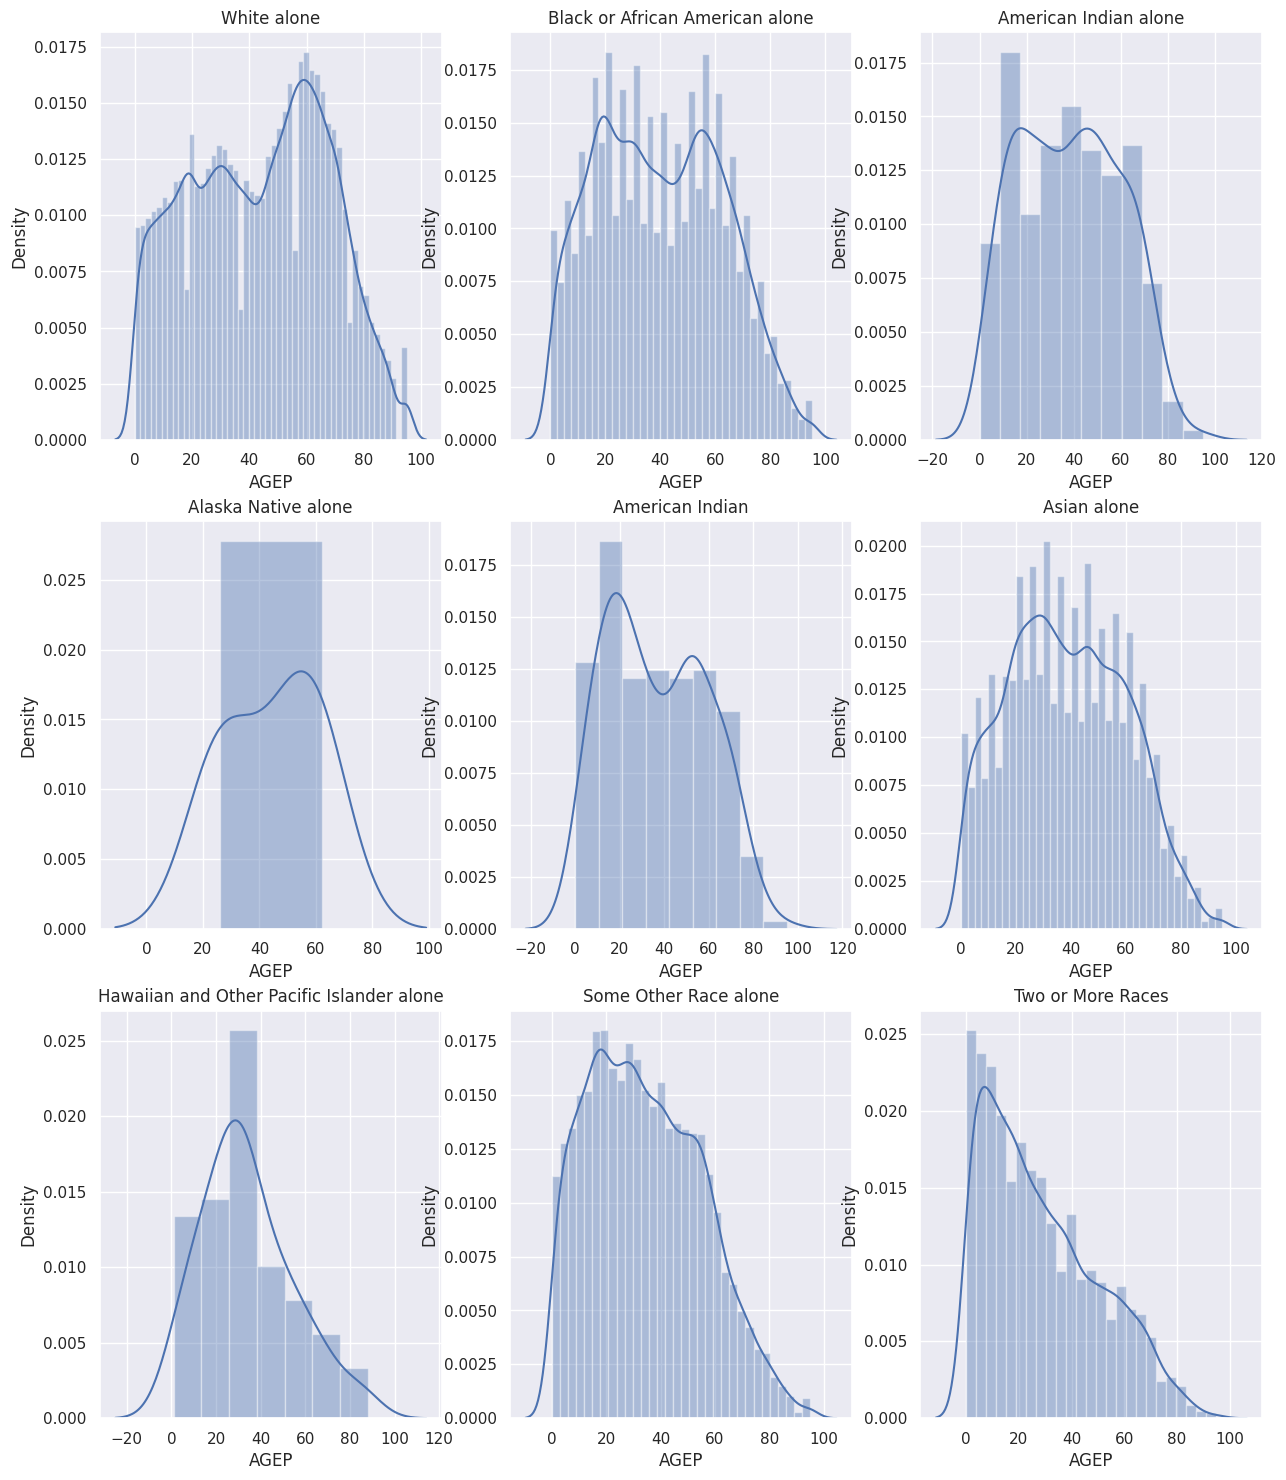

In [27]:
plot_column_grouped_by_race(plot_column='AGEP')

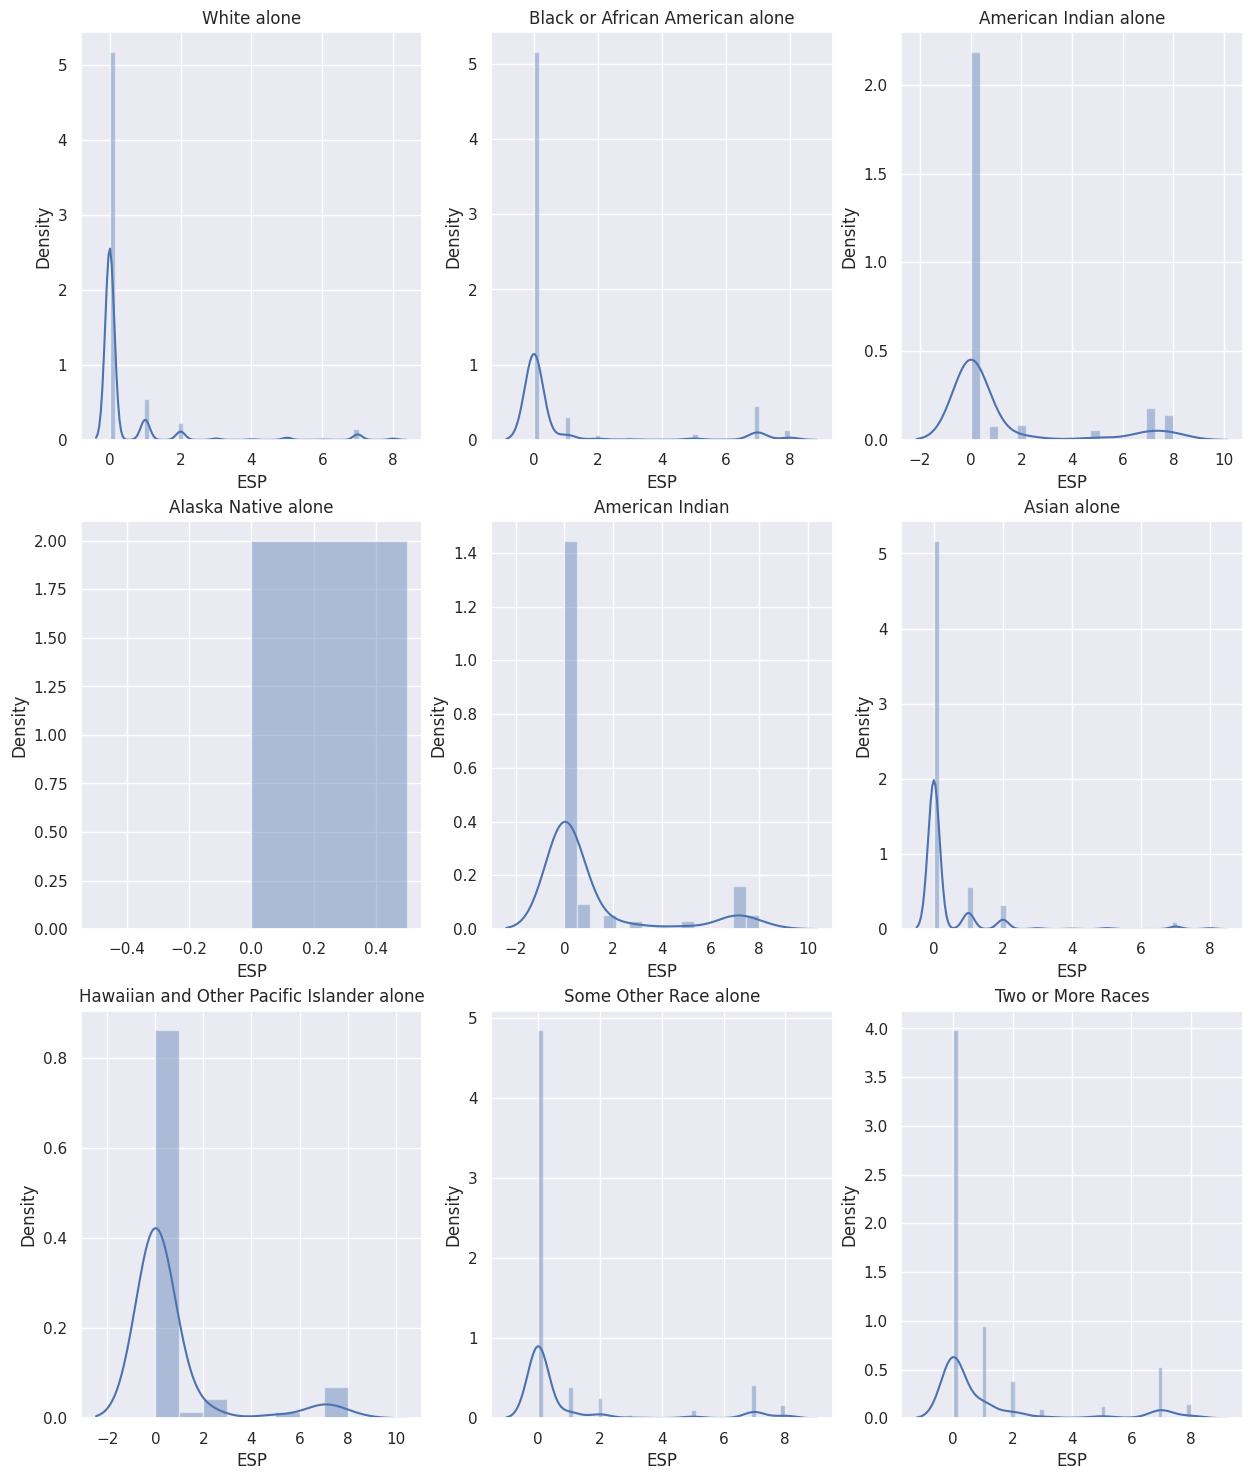

In [28]:
plot_column_grouped_by_race(plot_column='ESP')

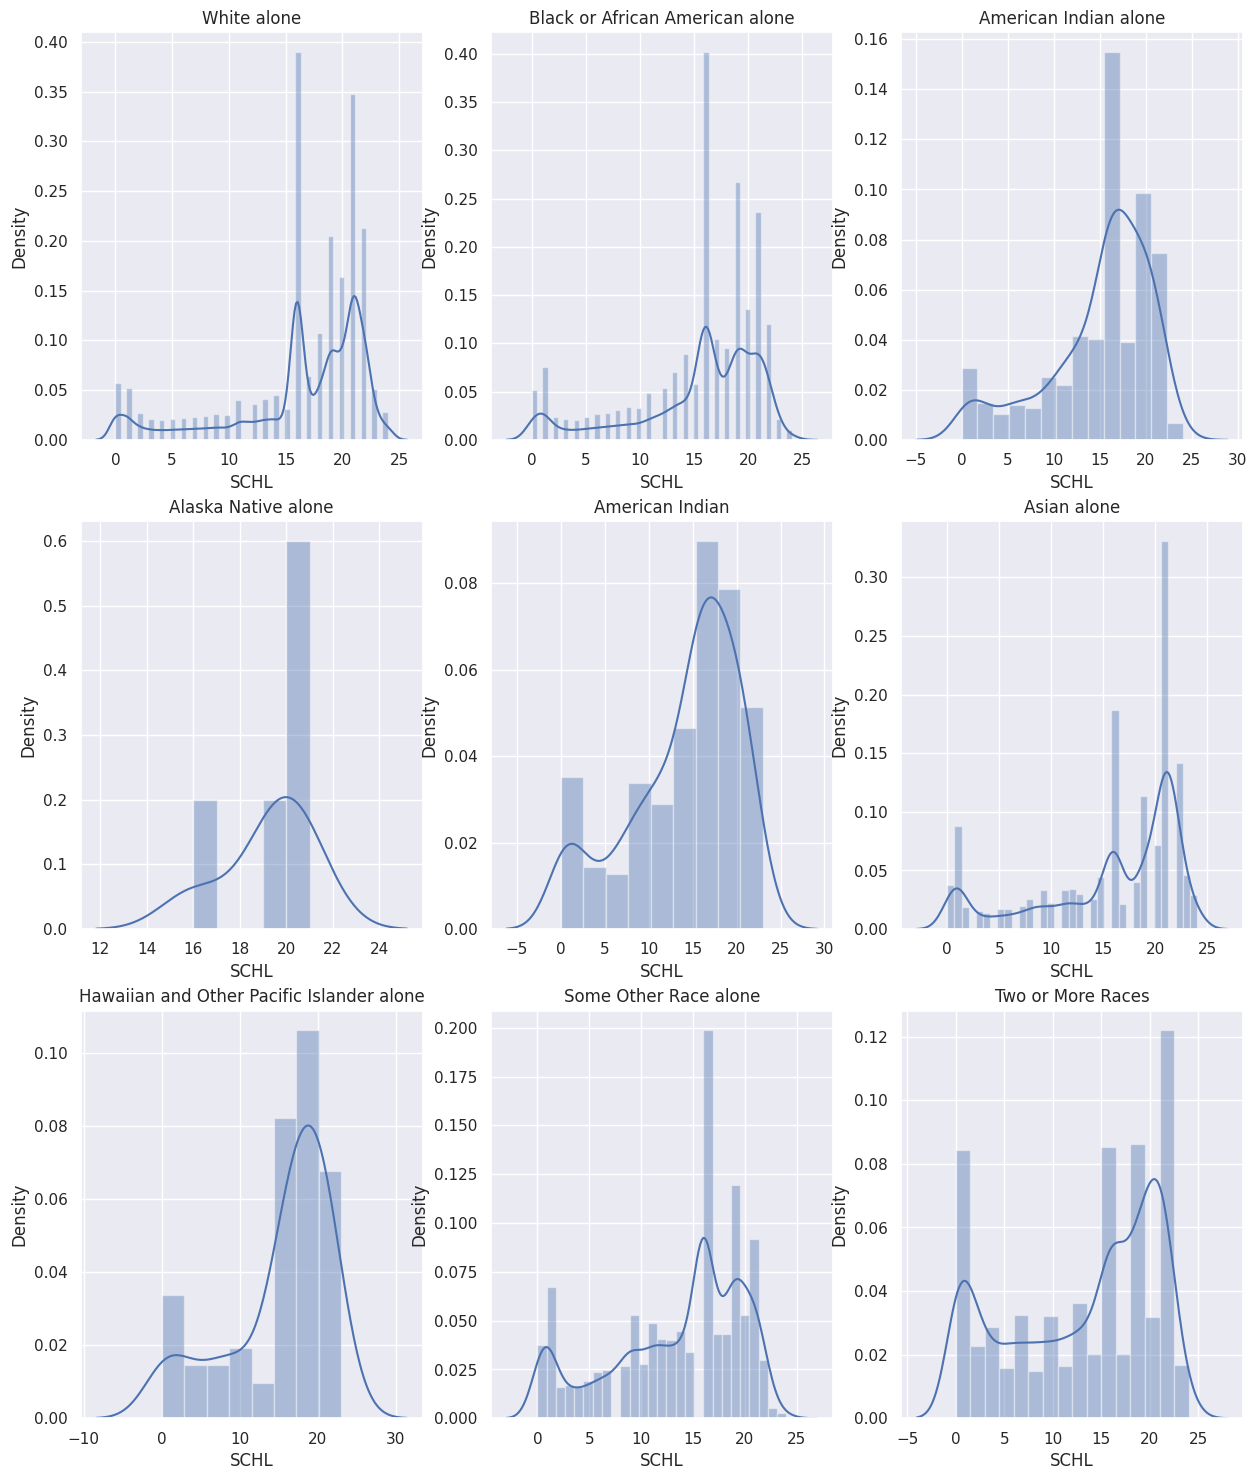

In [29]:
plot_column_grouped_by_race(plot_column='SCHL')

### Analyze Feature Importance

In [30]:
SEED = 42
features_df = full_df.drop('LABEL_ESR', axis=1, inplace=False)
target_df = full_df['LABEL_ESR']
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(features_df, target_df, test_size=0.2, random_state=SEED)
X_train_full.shape, X_test_full.shape

((157573, 16), (39394, 16))

Text(0.5, 0, 'Random Forest Feature Importance')

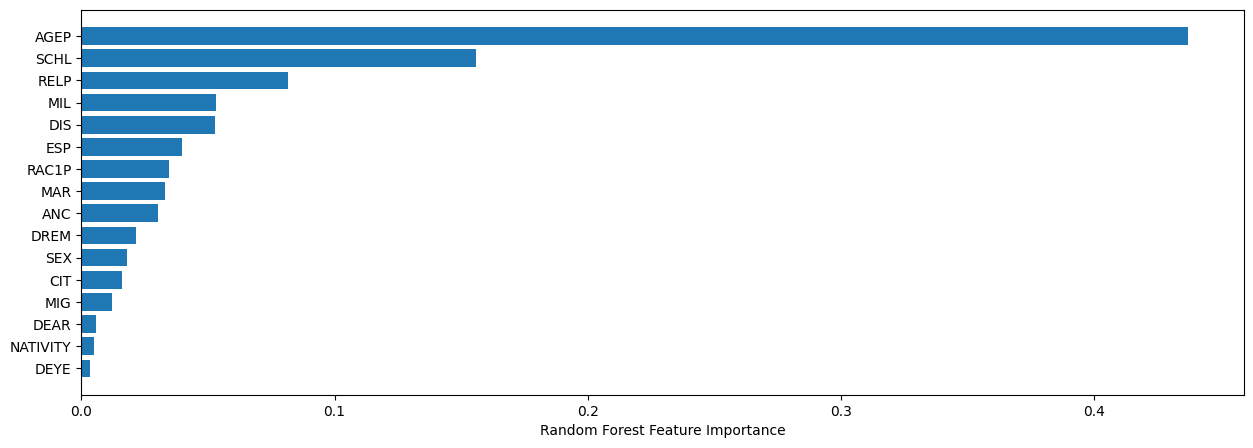

In [31]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_full, y_train_full)

sorted_idx = rf.feature_importances_.argsort()
plt.barh(features_df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Correlation Analysis after One-Hot Encoding

In [32]:
feature_analysis_cols = [col for col in full_df.columns if col not in ['AGEP', 'SCHL']]
features_analysis_df = pd.get_dummies(full_df[feature_analysis_cols], columns=feature_analysis_cols)
features_analysis_df['AGEP'] = full_df['AGEP']
features_analysis_df['SCHL'] = full_df['SCHL']
features_analysis_df['LABEL_ESR'] = full_df['LABEL_ESR']
features_analysis_df.head()

,MAR_1,MAR_2,MAR_3,MAR_4,MAR_5,RELP_0,RELP_1,RELP_2,RELP_3,RELP_4,...,RAC1P_5,RAC1P_6,RAC1P_7,RAC1P_8,RAC1P_9,LABEL_ESR_0,LABEL_ESR_1,AGEP,SCHL,LABEL_ESR
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,26,21,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,21,20,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,18,16,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,85,16,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,19,19,1


In [33]:
features_analysis_df.columns

Index(['MAR_1', 'MAR_2', 'MAR_3', 'MAR_4', 'MAR_5', 'RELP_0', 'RELP_1',
       'RELP_2', 'RELP_3', 'RELP_4', 'RELP_5', 'RELP_6', 'RELP_7', 'RELP_8',
       'RELP_9', 'RELP_10', 'RELP_11', 'RELP_12', 'RELP_13', 'RELP_14',
       'RELP_15', 'RELP_16', 'RELP_17', 'DIS_1', 'DIS_2', 'ESP_0', 'ESP_1',
       'ESP_2', 'ESP_3', 'ESP_4', 'ESP_5', 'ESP_6', 'ESP_7', 'ESP_8', 'CIT_1',
       'CIT_2', 'CIT_3', 'CIT_4', 'CIT_5', 'MIG_0', 'MIG_1', 'MIG_2', 'MIG_3',
       'MIL_0', 'MIL_1', 'MIL_2', 'MIL_3', 'MIL_4', 'ANC_1', 'ANC_2', 'ANC_3',
       'ANC_4', 'NATIVITY_1', 'NATIVITY_2', 'DEAR_1', 'DEAR_2', 'DEYE_1',
       'DEYE_2', 'DREM_0', 'DREM_1', 'DREM_2', 'SEX_1', 'SEX_2', 'RAC1P_1',
       'RAC1P_2', 'RAC1P_3', 'RAC1P_4', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7',
       'RAC1P_8', 'RAC1P_9', 'LABEL_ESR_0', 'LABEL_ESR_1', 'AGEP', 'SCHL',
       'LABEL_ESR'],
      dtype='object')

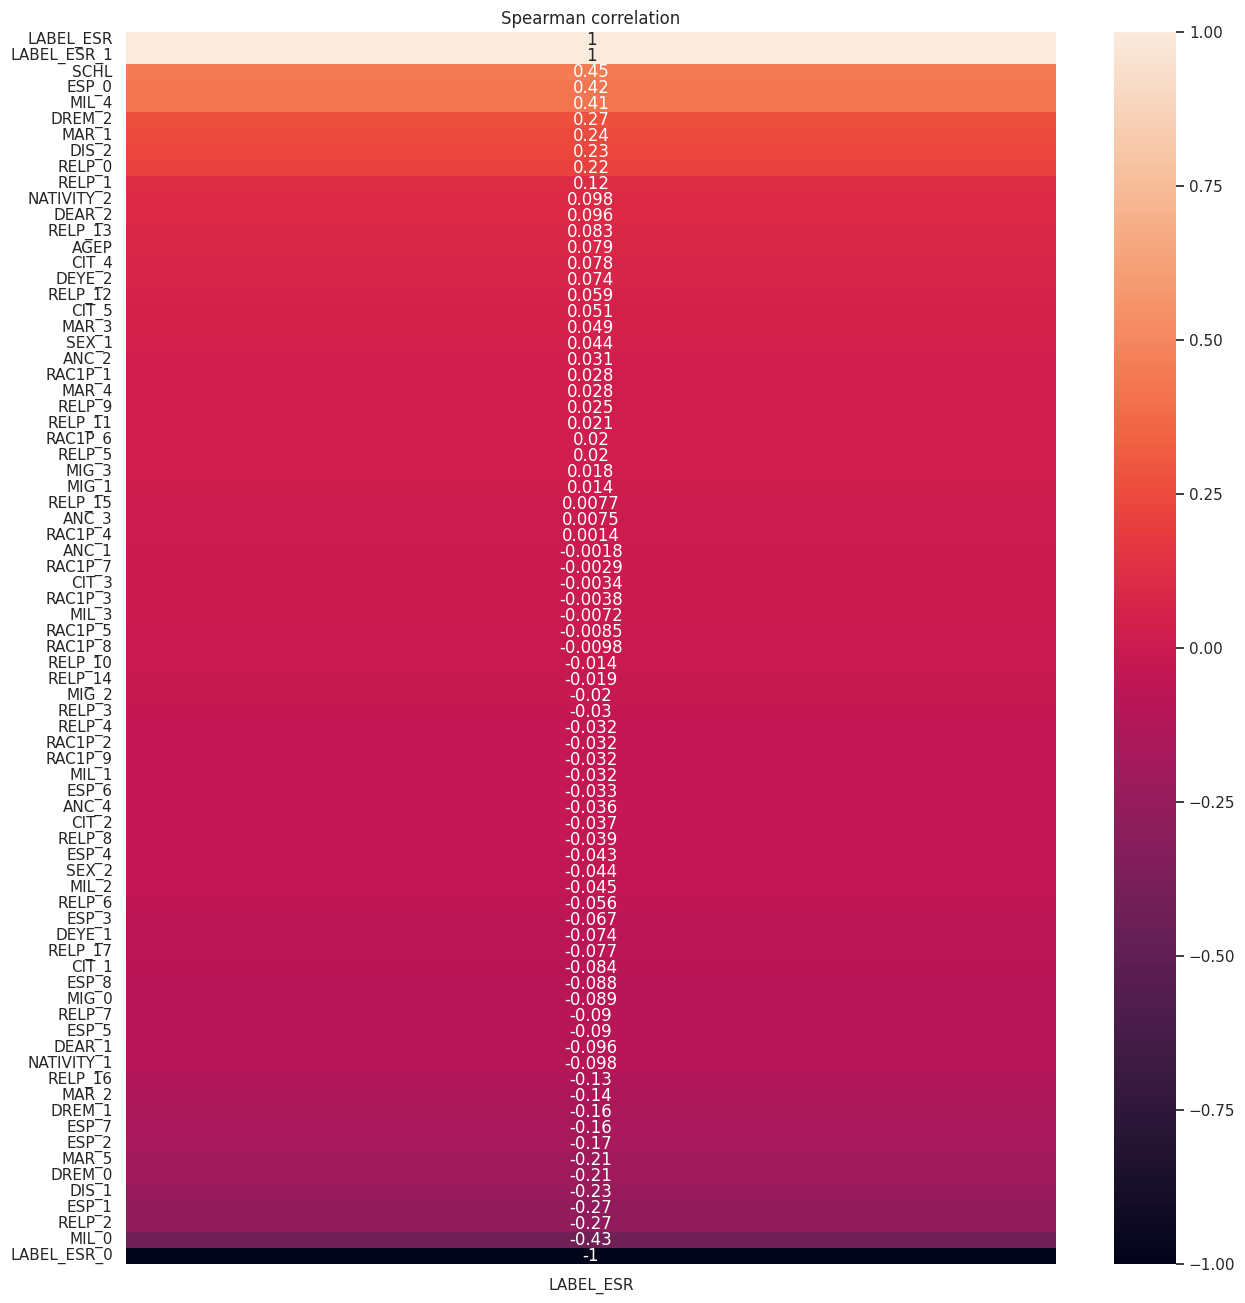

In [34]:
# Look at the feature correlation with 'LABEL_ESR' column
sns_set_size(height=16, width=15)
for method in ['spearman']:
    ax = plt.axes()
    sns.heatmap(
        features_analysis_df.corr(method=method)[['LABEL_ESR']]
            .sort_values(by='LABEL_ESR', ascending=False),
        ax=ax,
        annot=True
    )
    ax.set_title(f'{method.capitalize()} correlation')
    plt.show()

set_default_plot_properties()

In [35]:
def get_column_correlations(column_list):
    for method in ['spearman']:
        ax = plt.axes()
        sns.heatmap(features_analysis_df[column_list].corr(method=method), ax=ax, annot=True)
        ax.set_title(f'{method.capitalize()} Correlation')
        plt.show()

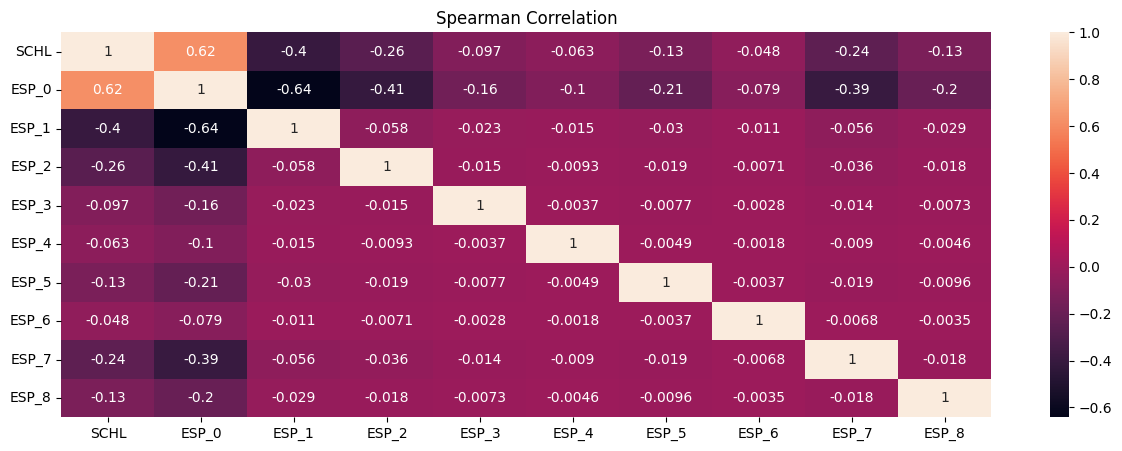

In [36]:
get_column_correlations(['SCHL', 'ESP_0', 'ESP_1', 'ESP_2', 'ESP_3', 'ESP_4', 'ESP_5', 'ESP_6', 'ESP_7', 'ESP_8'])

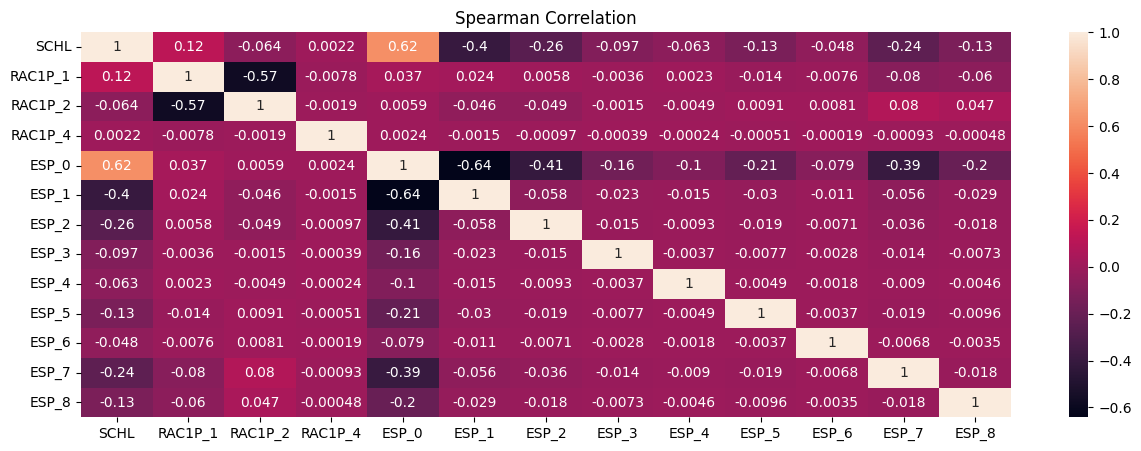

In [37]:
get_column_correlations(['SCHL', 'RAC1P_1', 'RAC1P_2', 'RAC1P_4', 'ESP_0', 'ESP_1',
                         'ESP_2', 'ESP_3', 'ESP_4', 'ESP_5', 'ESP_6', 'ESP_7', 'ESP_8'])

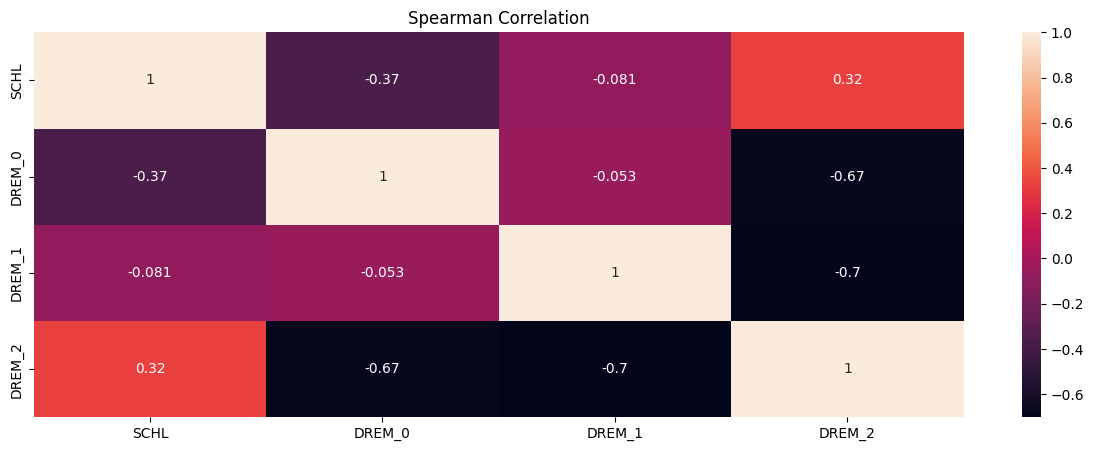

In [38]:
get_column_correlations(['SCHL', 'DREM_0', 'DREM_1', 'DREM_2'])

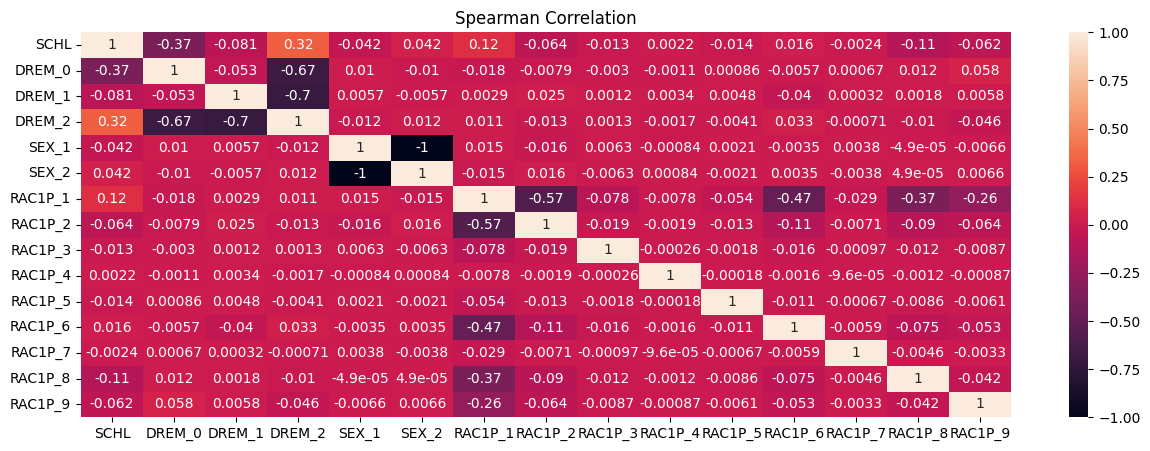

In [39]:
get_column_correlations(['SCHL', 'DREM_0', 'DREM_1', 'DREM_2', 'SEX_1', 'SEX_2', 'RAC1P_1', 'RAC1P_2',
                          'RAC1P_3', 'RAC1P_4', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7', 'RAC1P_8', 'RAC1P_9'])

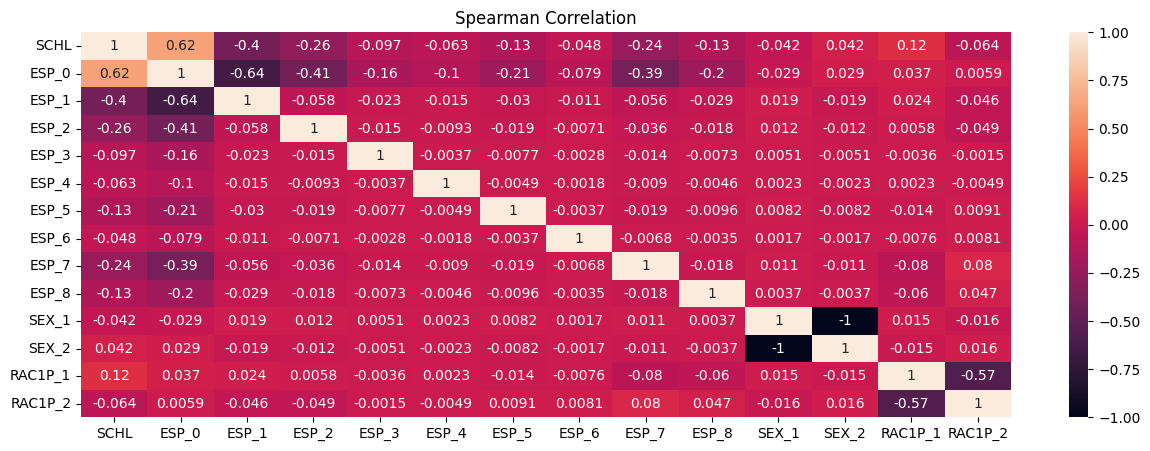

In [40]:
get_column_correlations(['SCHL', 'ESP_0', 'ESP_1', 'ESP_2', 'ESP_3', 'ESP_4', 'ESP_5', 'ESP_6',
                         'ESP_7','ESP_8', 'SEX_1', 'SEX_2', 'RAC1P_1', 'RAC1P_2'])